# Will our boys Go to the Gym or Stay Home?

## Step 1: Importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1.1: Loading the dataset

In [3]:
df = pd.read_csv("J:\Data Science\My Overall Notes\Data\Logistics_reg.csv")
df

,Temperature,Distance,Days Since Last,Gym Attendance
0,38,1.716910,28,0
1,26,3.713541,8,1
2,15,9.316795,19,0
3,39,2.633848,5,0
4,35,4.035587,17,0
...,...,...,...,...
298,36,7.333859,5,0
299,27,8.957452,16,0
300,35,1.254363,13,0
301,30,7.449217,16,0


## Scenario:
### Predict whether a person will go to the gym or stay home based on:
    1. Outside temperature (hot weather = less likely),
    2. Gym distance (km),
    3. Time since the last workout (days).
#### Features: Temperature, Distance, Days since last workout.
#### Target: Binary classification (Gym: Yes/No)
## Step 2: We will extract the dependent and independent variables from the given dataset. 

In [5]:
X = df[['Temperature', 'Distance']]
y = df[['Gym Attendance']].values.ravel() # Converts target column to 1D array

## Step 2.1: Spliting the dataset into training and Testing data

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test= train_test_split(X, y , test_size = 0.30, random_state=0 )

## Step 2.3: Feature Scaling

### In logistic regression, we will do feature scaling because we want accurate result of predictions

In [95]:
# We will only scale the independent variable because dependent variable have only 0 and 1 values.
from sklearn.preprocessing import StandardScaler    

st_x= StandardScaler()    

x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

## Step 2.4: Fitting the Model to the Training set

In [97]:
#Fitting model in Traing data set
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Step 2.5: Predicting Twoards the Test Result

In [99]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Step 3: Evaluation 

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[69  3]
 [ 6 13]]


#### By analyzing the confusion matrix, we can determine how accurate the projected outcome was and also 
#### we can understand that 69+13= 82 (Correct Output) and 6+3= 9 (Incorrect Output).

In [109]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1 score (harmonic mean of precision and recall)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.81
Recall: 0.68
F1 Score: 0.74


In [68]:
# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.81      0.68      0.74        19

    accuracy                           0.90        91
   macro avg       0.87      0.82      0.84        91
weighted avg       0.90      0.90      0.90        91



## Step 4: Visualizing the training set result

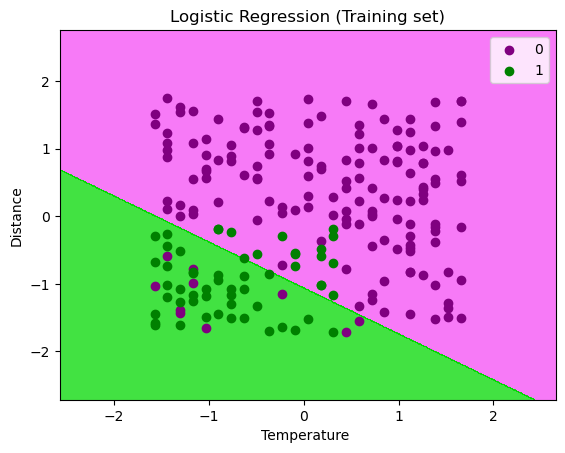

In [121]:
from matplotlib.colors import ListedColormap

# Visualize decision boundary (training set)
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01),
)

plt.contourf(
    x1,
    x2,
    model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(["#f54ef5", "#02d902"]),
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Scatter plot
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        color=["#800080", "#008000"][i],  # Fixed color issue
        label=j,
    )

plt.title("Logistic Regression (Training set)")
plt.xlabel("Temperature ")
plt.ylabel("Distance")
plt.legend()
plt.show()

#### The `purple` point observations are for which purchased (dependent variable) is probably 0 means Boys who `Not went` for GYM
#### The `green` point observations are for which purchased (dependent variable) is probably 1 means Boys who `went` for GYM

## Step 4.1: Visualizing the training set result

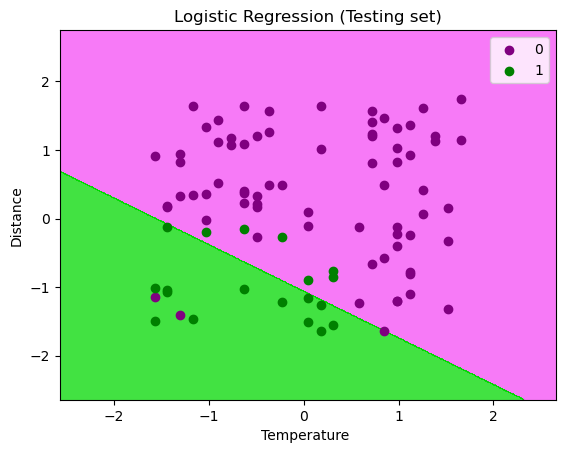

In [127]:
from matplotlib.colors import ListedColormap

# Visualize decision boundary (training set)
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01),
)

plt.contourf(
    x1,
    x2,
    model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(["#f54ef5", "#02d902"]),
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Scatter plot
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        color=["#800080", "#008000"][i],  # Fixed color issue
        label=j,
    )

plt.title("Logistic Regression (Testing set)")
plt.xlabel("Temperature ")
plt.ylabel("Distance")
plt.legend()
plt.show()

### We can estimate from the above graph that the Boys `went` for the gym when the `temperature is low` and with `less distance`
### and also the Boys `not went` for the gym when the `temperature is high` and with `more distance` 

## Step 5: Checking the Feature Importance

In [29]:
# 7. Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(coefficients)

Feature Importance:
       Feature  Coefficient
0  Temperature    -1.319554
1     Distance    -1.940549
